Detected text: 220
Detected text width: 122
 x1c: 122
 y1c: 47
 x2c: 0
 y2c: 0
Character: 2
Bounding Box (OpenCV): Bottom-left: (0, 47), Top-right: (60, 1)
Character: 2
Bounding Box (OpenCV): Bottom-left: (59, 21), Top-right: (66, 16)
Character: 0
Bounding Box (OpenCV): Bottom-left: (64, 33), Top-right: (100, 18)


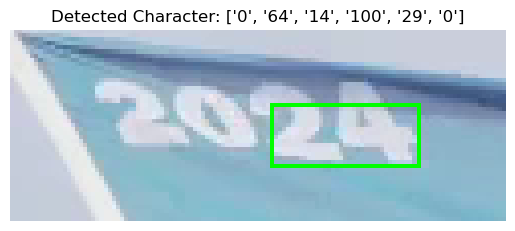

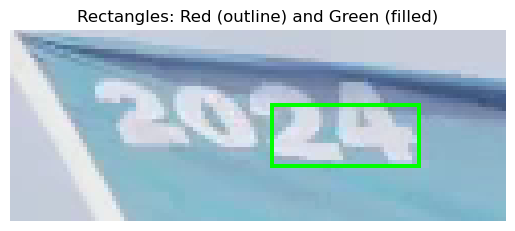

 text_x, y1, overlay_right2, y2: 30, 33, 100.  18


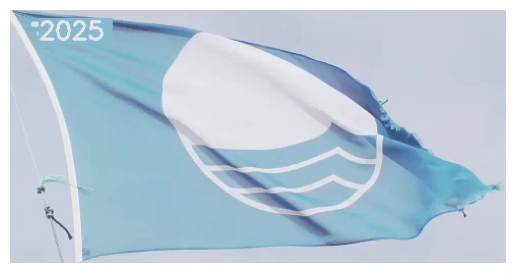

Updated image saved to: D:\FlagDetectionDatasets\ExportedDatasetsReduced\Augmentation\FlagsWithYearOCR\ocr_croppedcroppedflag.png


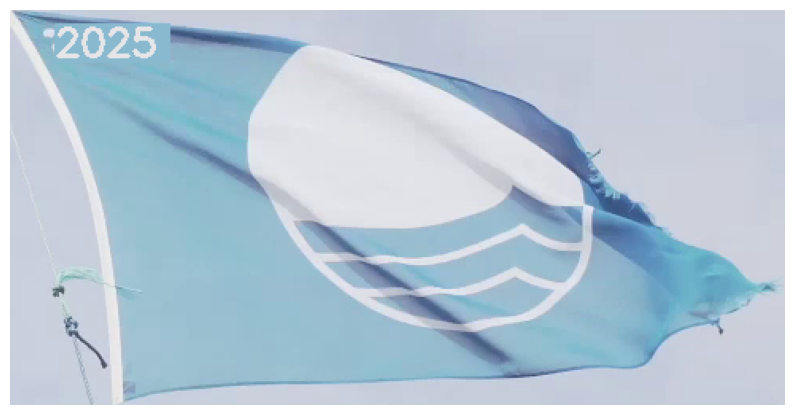

In [8]:
# Recovered code for augmentation 

import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt
import os

## d4d8da  or s similar > B, G, R) → (232, 229, 230)

# Load the image
#image_path= r"D:\FlagDetectionDatasets\ExportedDatasetsReduced\Augmentation\FlagsWithYearOCR\Cropped_BlueFlags\frame_000055_flag_crop_2.jpg"
#image_path= r"D:\FlagDetectionDatasets\ExportedDatasetsReduced\Augmentation\FlagsWithYearOCR\Cropped_BlueFlags\frame_000690_flag_crop_2.jpg"
image_path = r"D:/FlagDetectionDatasets/a_pSDS/new/croppedflag.png"
image = cv2.imread(image_path)
original_copy = image.copy()
# Extract the filename
filename = os.path.basename(image_path)

# Get initial dimensions
height, width = image.shape[:2]
# Start with the top-left crop
cropped_height = height // 5
cropped_width = width // 4
# Initialize variables
text_found = False
updated_image = None

# Replace text with overlay
replacement_text = "2025"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = .8
thickness = 2
# Calculate text size
text_size = cv2.getTextSize(replacement_text, font, font_scale, thickness)
text_width, text_height = text_size[0]
text_color = (232, 229, 230)  # An off white for the text in B, G, R) 
  
# Loop to progressively trim rows if no text is detected
while cropped_height > 0:
    cropped_img = image[:cropped_height, :cropped_width]
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Apply manual thresholding
    _, thresh = cv2.threshold(gray, 200, 180, cv2.THRESH_BINARY_INV)

    # Apply Gaussian blur after thresholding
    blurred = cv2.GaussianBlur(thresh, (5, 5), 0)

    # Perform OCR to detect digits
    custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789'
    text = pytesseract.image_to_string(blurred, config=custom_config).strip()

    if text:
        text_found = True
        print(f"Detected text: {text}")
        # Detect bounding boxes around individual digits
        boxes = pytesseract.image_to_boxes(blurred, config=custom_config)
        h, w = blurred.shape
        # Compute the combined bounding box for the entire detected text
        x1_combined, y1_combined, x2_combined, y2_combined = w, h, 0, 0  # Initialize to extreme values
        # width of the image (w), rightmost extreme in the image; 
        # During the loop, will be updated to smallest x1 value (leftmost detected character).
        # y1_combined = h: Initialized to the height of the image (h); bottommost extreme in OpenCV's coordinate system.
        # During the loop, updates to the largest y1 value (bottom boundary of the combined box).
        print(f"Detected text width: {w}")
        print(f" x1c: {x1_combined}")
        print(f" y1c: {y1_combined}")
        print(f" x2c: {x2_combined}")
        print(f" y2c: {y2_combined}")

        #<character> <x1> <y1> <x2> <y2> <page> e.g. Example: 2 50 100 100 150 0
        #<x1>, <y1>: Bottom-left corner of the bounding box (Tesseract coordinates).
        #<x2>, <y2>: Top-right corner of the bounding box (Tesseract coordinates).
        #<page>:
        #Coordinate	Calculation	
        #x1	int(b[1])	Horizontal coordinate of the bottom-left corner (unchanged).
        #y1	h - int(b[2])	Vertical coordinate of the bottom-left corner (inverted).
        #x2	int(b[3])	Horizontal coordinate of the top-right corner (unchanged).
        #y2	h - int(b[4])	Vertical coordinate of the top-right corner (inverted).
        # Conversion 
        #x1 = int(50)                 # Bottom-left corner, X-coordinate (unchanged)
        #y1 = h - int(100)            # Bottom-left corner, Y-coordinate: 200 - 100 = 100
        #x2 = int(100)                # Top-right corner, X-coordinate (unchanged)
        #y2 = h - int(150)            # Top-right corner, Y-coordinate: 200 - 150 = 50
        #x1, y1 = (50, 100)
        #x2, y2 = (100, 50)
        # For the first character, e.g., transform the values using:
        #x1 = int(b[1])                 # Bottom-left X-coordinate (unchanged)
        #y1 = h - int(b[2])             # Bottom-left Y-coordinate (inverted)
        #x2 = int(b[3])                 # Top-right X-coordinate (unchanged)
        #y2 = h - int(b[4])             # Top-right Y-coordinate (inverted)

        for box in boxes.splitlines():
            b = box.split()
            # Draw a bounding box around each detected character
            x1, y1, x2, y2 = int(b[1]), h - int(b[2]), int(b[3]), h - int(b[4])  # Convert Tesseract to OpenCV
            print(f"Character: {b[0]}")
            print(f"Bounding Box (OpenCV): Bottom-left: ({x1}, {y1}), Top-right: ({x2}, {y2})")
            # Calculate the combined bounding box that has all detected characters.
            x1_combined = min(x1_combined, x1)
            y1_combined = max(y1_combined, y1)
            x2_combined = max(x2_combined, x2)
            y2_combined = min(y2_combined, y2)

        # Ensure bounding box dimensions are within image bounds - OCR results may exceed the image boundaries
        # E.g. If x1_combined is negative (outside left boundary), it is set to 0.
        # Otherwise, it retains its original value
        x1_combined = max(0, x1_combined)
        y1_combined = min(h, y1_combined)
        x2_combined = min(w, x2_combined)
        y2_combined = max(0, y2_combined)

        #print(f"Bounding Box now: Bottom-left: ({x1_combined} {y1_combined}), Top-right: ({x2_combined}, {y2_combined})")
        #cv2.rectangle(cropped_img, (x1_combined, y1_combined), (x2_combined, y2_combined), (255, 0, 0), 2)  # BLUE!!!

        # Exit the loop to only draw the last bounding box calculated
        cv2.rectangle(cropped_img, (x1, y2), (x2, y1), (0, 255, 0), 1)  # Green - smaller inset 
        #cv2.rectangle(cropped_img, (x1_combined, y1_combined), (x2_combined, y2_combined), (230, 0, 0), 2) # 
        # Sadly the next one ends up being too big 
        #cv2.rectangle(cropped_img, (x1_combined, y2_combined), (x2_combined, y1_combined), (0, 255, 0), 2)  # Green
    
        # Display the result
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.title(f"Detected Character: {b}")# {b[0]}")
        plt.axis('off')
        plt.show()

        ###
        # Debugging: Print coordinates to verify correctness
        #print(f"x1_combined: {x1_combined}, y1_combined: {y1_combined}")
        #print(f"x2_combined: {x2_combined}, y2_combined: {y2_combined}")
        
        # Define overlay dimensions (use the same coordinates as the first rectangle)
        overlay_top = y2_combined
        overlay_bottom = y1_combined
        overlay_left = x1_combined
        overlay_right = x2_combined
        
        cv2.rectangle(cropped_img, (x1, y2), (x2, y1), (0, 255, 0), 1)  # Green - smaller inset 
        overlay_top2 = y2  # The top edge of the overlay corresponds to y2
        overlay_bottom2 = y1  # The bottom edge of the overlay corresponds to y1
        overlay_left2 = x1  # The left edge of the overlay corresponds to x1
        overlay_right2 = x2  # The right edge of the overlay corresponds to x2
        
        # Debugging: Verify overlay coordinates
        # print(f"Overlay Coordinates: Top={overlay_top}, Bottom={overlay_bottom}, Left={overlay_left}, Right={overlay_right}")
        # Apply a solid color overlay (filled green rectangle)
        #cv2.rectangle(cropped_img, (x1_combined, y1_combined), (x2_combined, y2_combined), (255, 0, 0), 2)  # blue
        # Draw the first rectangle (red outline)
        # cv2.rectangle(cropped_img, (x1_combined, y1_combined), (x2_combined, y2_combined), (230, 0, 0), 2) # 
        # Show the resulting image
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.title("Rectangles: Red (outline) and Green (filled)")
        plt.axis('off')
        plt.show()

        # Sample background color from the bottom-right corner of the combined bounding box
        sample_x1 = max(min(x2_combined, cropped_width - 1), 0)  # Ensure within bounds
        sample_y1 = max(min(y1_combined, cropped_height - 1), 0)  # Ensure within bounds

        # Define the sampling region
        # sample_region_top_left is the area we want to overlay with the colour from bottom right???
        sample_region_top_left = (max(sample_x1 - 2, 0), max(sample_y1 - 2, 0))
        sample_region_bottom_right = (min(sample_x1 + 2, original_copy.shape[1] - 1),
                                       min(sample_y1 + 2, original_copy.shape[0] - 1))

        # Draw the sampling region as a bounding box on the original image (for debugging)
        #cv2.rectangle(original_copy, sample_region_top_left, sample_region_bottom_right, (100, 100, 50), 2)

        # Extract the sampling region
        sample_region = original_copy[sample_region_top_left[1]:sample_region_bottom_right[1],
                                      sample_region_top_left[0]:sample_region_bottom_right[0]]

        # Validate the sampling region
        if sample_region.size > 0:
            background_color = np.mean(sample_region, axis=(0, 1)).astype(int).tolist()
            #print(f"Background_color from sample region : ) : {background_color}")
        else:
            # Fall back to the average color of the cropped image
            background_color = np.mean(cropped_img, axis=(0, 1)).astype(int).tolist()
            #print(f"Fallback colour : ( ")

        overlay_color = (0, 255, 0)  # Green
        #cv2.rectangle(cropped_img, (overlay_left2, overlay_top2), (overlay_right2, overlay_bottom2), overlay_color, -1)
        #cv2.rectangle(cropped_img, (overlay_left2, overlay_top2), (overlay_right2, overlay_bottom2), background_color, -1)

        # Display the original image with the sampling bounding boxor
        #print("Original image with sampling region highlighted:")
        #plt.imshow(cv2.cvtColor(original_copy, cv2.COLOR_BGR2RGB))
        #plt.axis('off')
        #plt.show()

        #cv2.rectangle(cropped_img, (x1_combined, y1_combined), (x2_combined, y2_combined), (255, 0, 0), 2) # red

        # Define the overlay region to match the text's height
        #overlay_top = max(y1_combined - text_height, 0)  # Match the top of the text / Ensure within bounds
        #overlay_bottom = y2_combined
        #overlay_left = x1_combined
        #overlay_right = x2_combined #+ text_width

        # Define the overlay region to match the text's height
        #overlay_top = max(y1_combined - text_height, x1_combined)  # Match the top of the text / Ensure within bounds
        #overlay_bottom = y2_combined - text_height
        #overlay_left = x1_combined
        #overlay_right = x2_combined #+ text_width

        #cv2.rectangle(cropped_img, (x1_combined, y1_combined), (x2_combined, y2_combined), (255, 0, 0), 1) # red
       
        # Define overlay dimensions
        #overlay_top = y2_combined 
        #overlay_bottom = y1_combined
        #overlay_left = x1_combined
        #overlay_right = x2_combined

        # Define overlay dimensions (use the same coordinates as the first rectangle)
        #overlay_top = y2_combined
        #overlay_bottom = y1_combined
        #overlay_left = x1_combined
        #overlay_right = x2_combined

        # Apply a solid color overlay (filled green rectangle)
        #overlay_color = (0, 255, 0)  # Green
        #cv2.rectangle(cropped_img, (overlay_left, overlay_top), (overlay_right, overlay_bottom), overlay_color, -1)
        #cv2.rectangle(cropped_img, (x1_combined, y1_combined), (x2_combined, y2_combined), (255, 0, 0), 1) # red
       
        #overlay_top = y1_combined - text_height #* 2 # Move the top of the overlay up by the text height
        #overlay_bottom = y1_combined #- text_height
        #overlay_left = x1_combined #+ 20 #text_height 
        #overlay_right = x1_combined + text_width
        
        # Fill the overlay area with the sampled background color
        #cv2.rectangle(cropped_img, (overlay_left, overlay_top), (overlay_right, overlay_bottom), background_color, -1)
        
        # Align text baseline to the detected text and shift it upwards 
        text_x = overlay_left + (w//4)  # + text_height # : -(
        text_y = y1_combined  - (text_height )  # Shift text upwards by txt height
        overlay_x_offset = int(text_x * 1.2)
        overlay_y_offset = int(text_height/2)
        #   cv2.rectangle(cropped_img, (text_x, y1 + text_height), (overlay_right2, y2 + text_x), (background_color), -1)
        #   cv2.rectangle(cropped_img, (text_x, y1 + text_height), (overlay_right2, y2 + text_x), (overlay_color), -1)
        #   cv2.rectangle(cropped_img, (text_x, y1 + text_height), (overlay_right2, y2 + text_x), (background_color), -1)
        cv2.rectangle(cropped_img, (overlay_left2 - overlay_x_offset, (overlay_top2 - overlay_y_offset)), (overlay_right2, overlay_bottom2), background_color, -1)

        print(f" text_x, y1, overlay_right2, y2: {text_x}, {y1}, {overlay_right2}.  {y2}")
        cv2.putText(cropped_img, replacement_text, (overlay_left2 - overlay_x_offset, text_y), font, font_scale, (text_color), thickness)

        #cv2.putText(cropped_img, replacement_text, (text_x, text_y), font, font_scale, (255, 255, 255), thickness)
        # Save the updated cropped image
        updated_image = cropped_img.copy()

        # Integrate updated cropped image into the original image
        original_copy[:cropped_height, :cropped_width] = updated_image
        break  # Exit the loop after finding and processing text

    # If no text, reduce the crop by one row and retry
    cropped_height -= 1

# Display results
if original_copy is not None:
    #print("Final image with updated text:")
    plt.imshow(cv2.cvtColor(original_copy, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    # Save and display the results for debugging
    output_path = f"D:\FlagDetectionDatasets\ExportedDatasetsReduced\Augmentation\FlagsWithYearOCR\ocr_cropped_{filename}"
    #if updated_image is not None:
    cv2.imwrite(output_path, original_copy)
    print(f"Updated image saved to: {output_path}")
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(original_copy, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
else:
    print("No updated image available. No text was detected or processed.")